In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Tahap 0: Menginstal library yang diperlukan (SHAP, LIME)...
✓ Instalasi selesai.

Tahap 1: Mengimpor library dan melakukan pengaturan global...
  - TensorFlow Version: 2.18.0
  - SHAP Version: 0.44.1
  - GPU Available: Yes
  - Mixed Precision Policy: float32
✓ Pengaturan global selesai.

Tahap 2: Langkah ini (Segmentasi U-Net) telah dihapus sesuai permintaan.
✓ Model segmentasi diatur sebagai None.

Tahap 3: Mengonfigurasi parameter dan menyiapkan pipeline data...
✓ Dataset ditemukan!
  - Parameter diatur: Epochs=30, Batch Size=32

--- Distribusi Dataset ---
       NORMAL  PNEUMONIA  Total
train    1341       3875   5216
val         8          8     16
test      234        390    624

✓ Bobot kelas dihitung untuk mengatasi ketidakseimbangan: {0: 1.9448173005219984, 1: 0.6730322580645162}

Membuat generator data...
Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
✓ Generator 224x224 (untuk ResNet50, DenseNet121) b

Model: "ResNet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                               ┃ Output Shape                    ┃           Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_ResNet50 (InputLayer)                │ (None, 224, 224, 3)             │                 0 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ resnet50 (Functional)                      │ (None, 7, 7, 2048)              │        23,587,712 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ global_avg_pool (GlobalAveragePooling2D)   │ (None, 2048)                    │                 0 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ dropout_top_1 (Dropout)                    │ (None, 2048)                    │                 0 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ dense_top_1 (Dense)                        │ (None, 512)                     │         1,049,088 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ dropout_top_2 (Dropout)                    │ (None, 512)                     │                 0 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ output_classifier (Dense)                  │ (None, 1)                       │               513 │
└────────────────────────────────────────────┴─────────────────────────────────┴───────────────────┘

 Total params: 24,637,313 (93.98 MB)

 Trainable params: 18,000,129 (68.67 MB)

 Non-trainable params: 6,637,184 (25.32 MB)

Epoch 1/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 622ms/step - accuracy: 0.9061 - auc: 0.9608 - loss: 0.2127 - precision: 0.9673 - recall: 0.9030
Epoch 1: val_accuracy improved from -inf to 0.93750, saving model to ./saved_models/ResNet50_best_weights.weights.h5
163/163 ━━━━━━━━━━━━━━━━━━━━ 140s 669ms/step - accuracy: 0.9063 - auc: 0.9609 - loss: 0.2122 - precision: 0.9674 - recall: 0.9032 - val_accuracy: 0.9375 - val_auc: 1.0000 - val_loss: 0.1227 - val_precision: 0.8889 - val_recall: 1.0000 - learning_rate: 1.0000e-04
Epoch 2/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 620ms/step - accuracy: 0.9765 - auc: 0.9968 - loss: 0.0629 - precision: 0.9920 - recall: 0.9759
Epoch 2: val_accuracy improved from 0.93750 to 1.00000, saving model to ./saved_models/ResNet50_best_weights.weights.h5
163/163 ━━━━━━━━━━━━━━━━━━━━ 103s 629ms/step - accuracy: 0.9765 - auc: 0.9968 - loss: 0.0629 - precision: 0.9920 - recall: 0.9759 - val_accuracy: 1.0000 - val_auc: 1.0000 - val_loss: 0.0271 - val_precision: 1.0000 - val_re

Model: "DenseNet121"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                               ┃ Output Shape                    ┃           Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_DenseNet121 (InputLayer)             │ (None, 224, 224, 3)             │                 0 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ densenet121 (Functional)                   │ (None, 7, 7, 1024)              │         7,037,504 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ global_avg_pool (GlobalAveragePooling2D)   │ (None, 1024)                    │                 0 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ dropout_top_1 (Dropout)                    │ (None, 1024)                    │                 0 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ dense_top_1 (Dense)                        │ (None, 512)                     │           524,800 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ dropout_top_2 (Dropout)                    │ (None, 512)                     │                 0 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ output_classifier (Dense)                  │ (None, 1)                       │               513 │
└────────────────────────────────────────────┴─────────────────────────────────┴───────────────────┘

 Total params: 7,562,817 (28.85 MB)

 Trainable params: 1,600,961 (6.11 MB)

 Non-trainable params: 5,961,856 (22.74 MB)

Epoch 1/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 612ms/step - accuracy: 0.7340 - auc: 0.8154 - loss: 0.5111 - precision: 0.8861 - recall: 0.7324
Epoch 1: val_accuracy improved from -inf to 0.56250, saving model to ./saved_models/DenseNet121_best_weights.weights.h5
163/163 ━━━━━━━━━━━━━━━━━━━━ 156s 701ms/step - accuracy: 0.7345 - auc: 0.8160 - loss: 0.5103 - precision: 0.8864 - recall: 0.7328 - val_accuracy: 0.5625 - val_auc: 0.9688 - val_loss: 0.6914 - val_precision: 0.5333 - val_recall: 1.0000 - learning_rate: 1.0000e-04
Epoch 2/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 612ms/step - accuracy: 0.8953 - auc: 0.9640 - loss: 0.2393 - precision: 0.9660 - recall: 0.8900
Epoch 2: val_accuracy improved from 0.56250 to 0.93750, saving model to ./saved_models/DenseNet121_best_weights.weights.h5
163/163 ━━━━━━━━━━━━━━━━━━━━ 101s 620ms/step - accuracy: 0.8954 - auc: 0.9640 - loss: 0.2392 - precision: 0.9661 - recall: 0.8901 - val_accuracy: 0.9375 - val_auc: 1.0000 - val_loss: 0.2330 - val_precision: 0.8889 - 

Model: "InceptionV3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                               ┃ Output Shape                    ┃           Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_InceptionV3 (InputLayer)             │ (None, 299, 299, 3)             │                 0 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ inception_v3 (Functional)                  │ (None, 8, 8, 2048)              │        21,802,784 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ global_avg_pool (GlobalAveragePooling2D)   │ (None, 2048)                    │                 0 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ dropout_top_1 (Dropout)                    │ (None, 2048)                    │                 0 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ dense_top_1 (Dense)                        │ (None, 512)                     │         1,049,088 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ dropout_top_2 (Dropout)                    │ (None, 512)                     │                 0 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ output_classifier (Dense)                  │ (None, 1)                       │               513 │
└────────────────────────────────────────────┴─────────────────────────────────┴───────────────────┘

 Total params: 22,852,385 (87.17 MB)

 Trainable params: 8,222,913 (31.37 MB)

 Non-trainable params: 14,629,472 (55.81 MB)

Epoch 1/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 930ms/step - accuracy: 0.8817 - auc: 0.9546 - loss: 0.2532 - precision: 0.9625 - recall: 0.8735
Epoch 1: val_accuracy improved from -inf to 0.81250, saving model to ./saved_models/InceptionV3_best_weights.weights.h5
163/163 ━━━━━━━━━━━━━━━━━━━━ 188s 983ms/step - accuracy: 0.8820 - auc: 0.9548 - loss: 0.2527 - precision: 0.9626 - recall: 0.8738 - val_accuracy: 0.8125 - val_auc: 1.0000 - val_loss: 0.3222 - val_precision: 0.7273 - val_recall: 1.0000 - learning_rate: 1.0000e-04
Epoch 2/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 919ms/step - accuracy: 0.9603 - auc: 0.9935 - loss: 0.0999 - precision: 0.9890 - recall: 0.9573
Epoch 2: val_accuracy improved from 0.81250 to 1.00000, saving model to ./saved_models/InceptionV3_best_weights.weights.h5
163/163 ━━━━━━━━━━━━━━━━━━━━ 151s 927ms/step - accuracy: 0.9603 - auc: 0.9935 - loss: 0.0999 - precision: 0.9890 - recall: 0.9573 - val_accuracy: 1.0000 - val_auc: 1.0000 - val_loss: 0.1217 - val_precision: 1.0000 - 

Prediksi ResNet50:   0%|          | 0/624 [00:00<?, ?it/s]

  - Menghitung prediksi untuk DenseNet121...


Prediksi DenseNet121:   0%|          | 0/624 [00:00<?, ?it/s]

  - Menghitung prediksi untuk InceptionV3...


Prediksi InceptionV3:   0%|          | 0/624 [00:00<?, ?it/s]


EVALUASI MODEL INDIVIDUAL: ResNet50

--- Laporan Evaluasi untuk ResNet50 ---
Accuracy:  0.9071
F1-Score:  0.9286
Precision: 0.8934
Recall:    0.9667
AUC-ROC:   0.9755

Confusion Matrix:
[[189  45]
 [ 13 377]]

Classification Report:
                     precision    recall  f1-score   support

   Normal (Class 0)     0.9356    0.8077    0.8670       234
Pneumonia (Class 1)     0.8934    0.9667    0.9286       390

           accuracy                         0.9071       624
          macro avg     0.9145    0.8872    0.8978       624
       weighted avg     0.9092    0.9071    0.9055       624


EVALUASI MODEL INDIVIDUAL: DenseNet121

--- Laporan Evaluasi untuk DenseNet121 ---
Accuracy:  0.6314
F1-Score:  0.7723
Precision: 0.6290
Recall:    1.0000
AUC-ROC:   0.9274

Confusion Matrix:
[[  4 230]
 [  0 390]]

Classification Report:
                     precision    recall  f1-score   support

   Normal (Class 0)     1.0000    0.0171    0.0336       234
Pneumonia (Class 1)     0.6290    

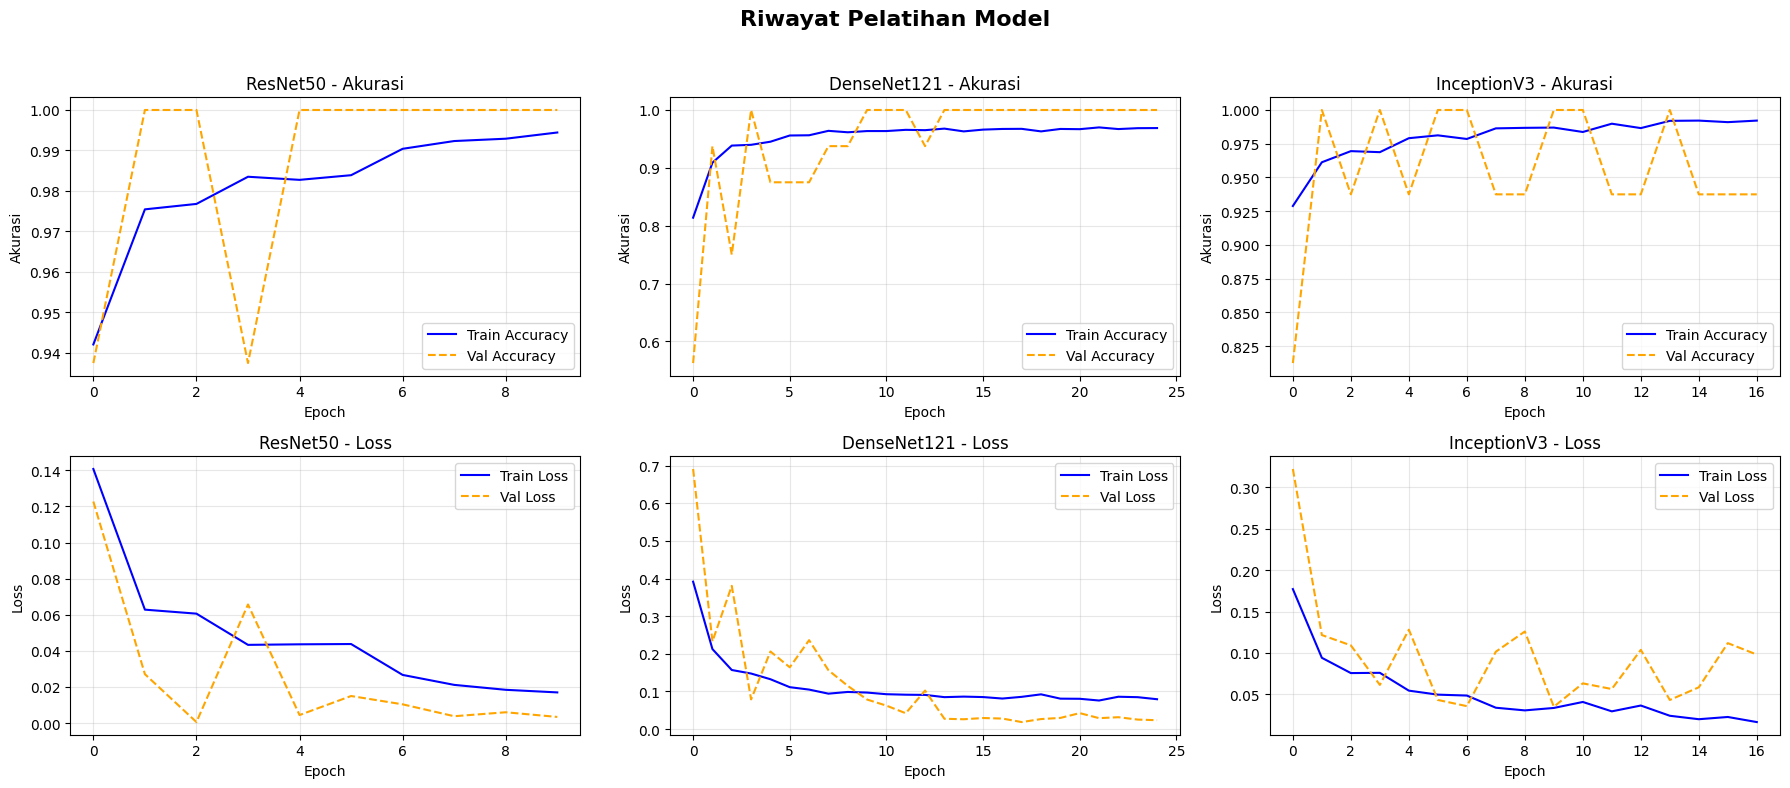


--- Confusion Matrix - Ensemble ---


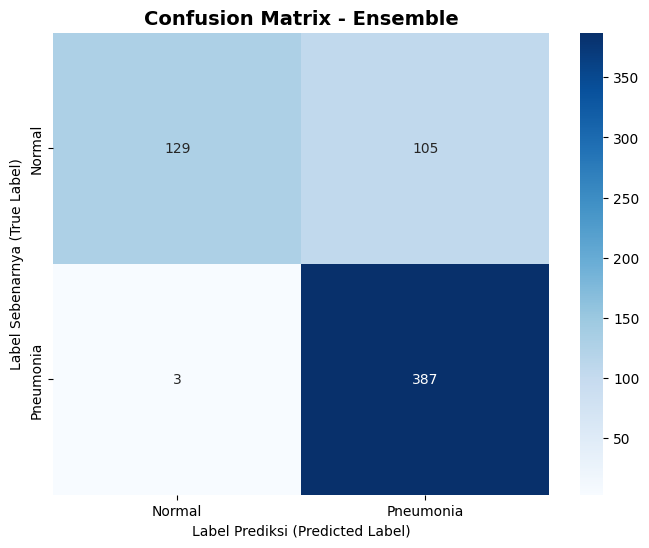


--- ROC Curve - Ensemble ---


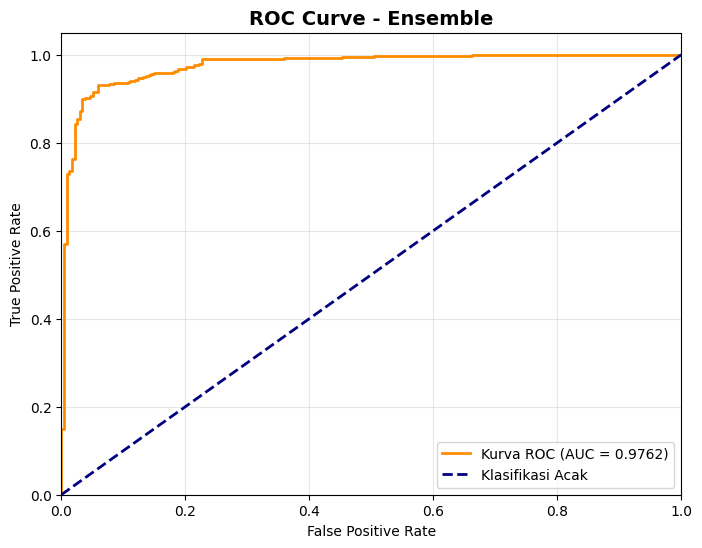


RINGKASAN METRIK EVALUASI
             Accuracy  F1-Score  Precision  Recall  AUC-ROC
ResNet50       0.9071    0.9286     0.8934  0.9667   0.9755
DenseNet121    0.6314    0.7723     0.6290  1.0000   0.9274
InceptionV3    0.8333    0.8805     0.7979  0.9821   0.9661
Ensemble       0.8269    0.8776     0.7866  0.9923   0.9762

✓ Evaluasi dan visualisasi performa selesai.

Akhir dari Bagian 3/4. Silakan berikan perintah 'lanjutkan'.
Memulai Bagian 4: Analisis Explainable AI (XAI) - LIME...

Tahap 8: Mendefinisikan fungsi untuk analisis LIME...
✓ Fungsi untuk analisis LIME telah didefinisikan.

Tahap 9: Menjalankan pipeline analisis XAI (LIME) pada sampel data tes...

--- Menganalisis gambar: person1676_virus_2892.jpeg ---
  - Memproses model: ResNet50
  - Inisialisasi LIME Explainer untuk ResNet50...
  - Menghasilkan penjelasan LIME untuk person1676_virus_2892.jpeg...


  0%|          | 0/100 [00:00<?, ?it/s]

  - Membuat visualisasi LIME untuk person1676_virus_2892.jpeg...


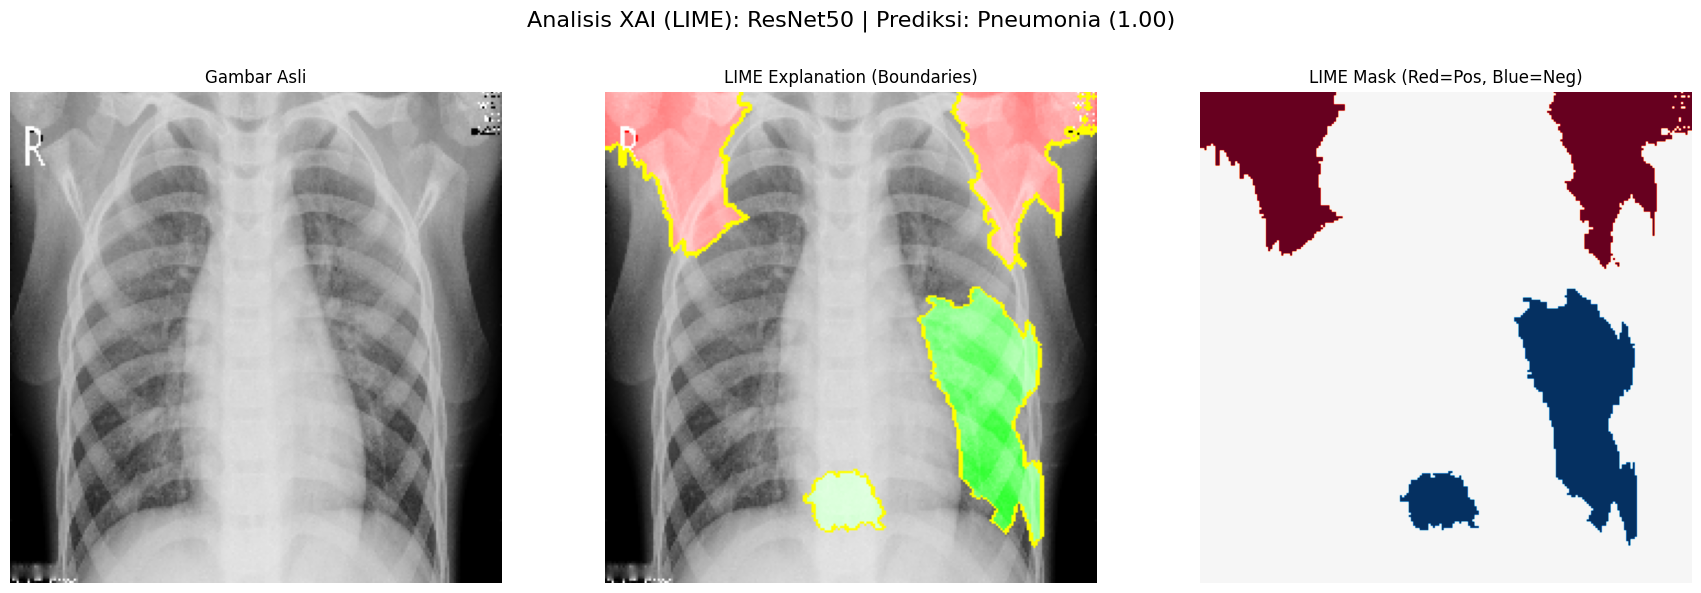

  - Memproses model: DenseNet121
  - Inisialisasi LIME Explainer untuk DenseNet121...
  - Menghasilkan penjelasan LIME untuk person1676_virus_2892.jpeg...


  0%|          | 0/100 [00:00<?, ?it/s]

  - Membuat visualisasi LIME untuk person1676_virus_2892.jpeg...


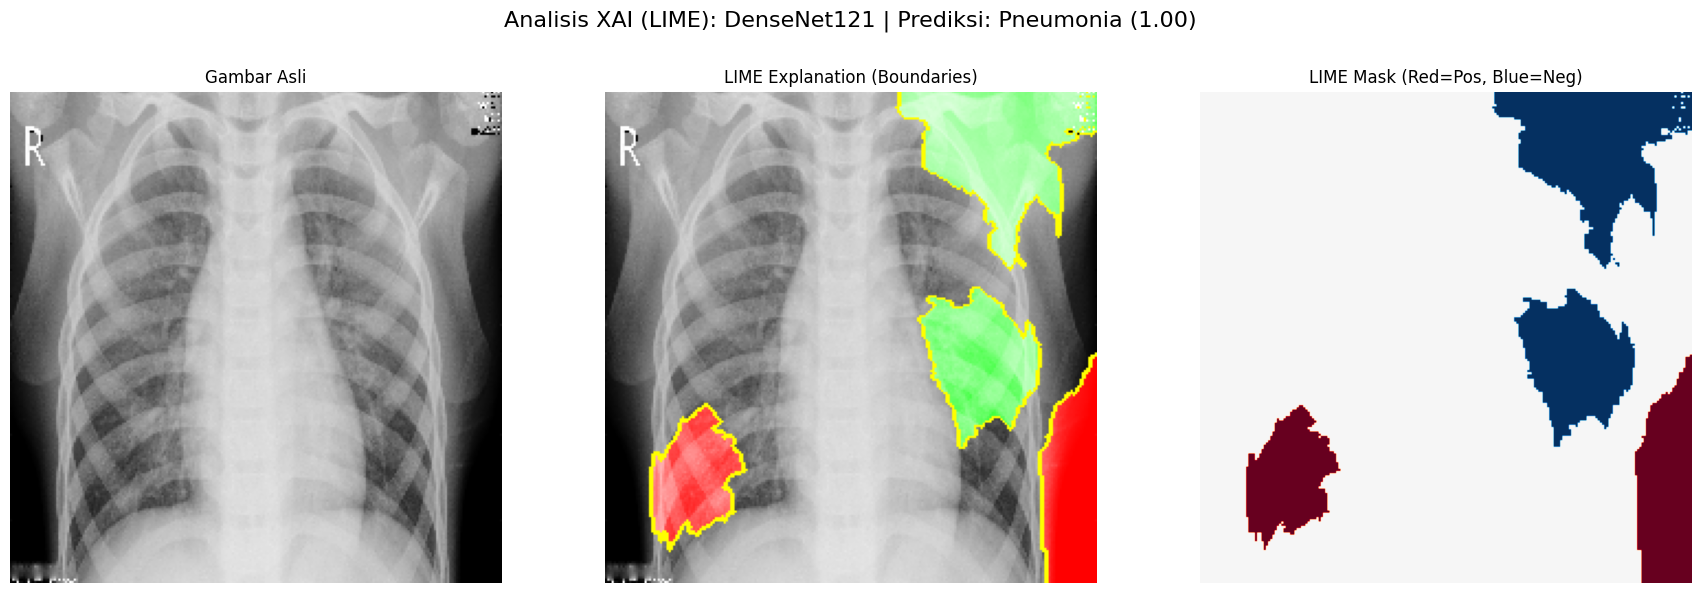

  - Memproses model: InceptionV3
  - Inisialisasi LIME Explainer untuk InceptionV3...
  - Menghasilkan penjelasan LIME untuk person1676_virus_2892.jpeg...


  0%|          | 0/100 [00:00<?, ?it/s]

  - Membuat visualisasi LIME untuk person1676_virus_2892.jpeg...


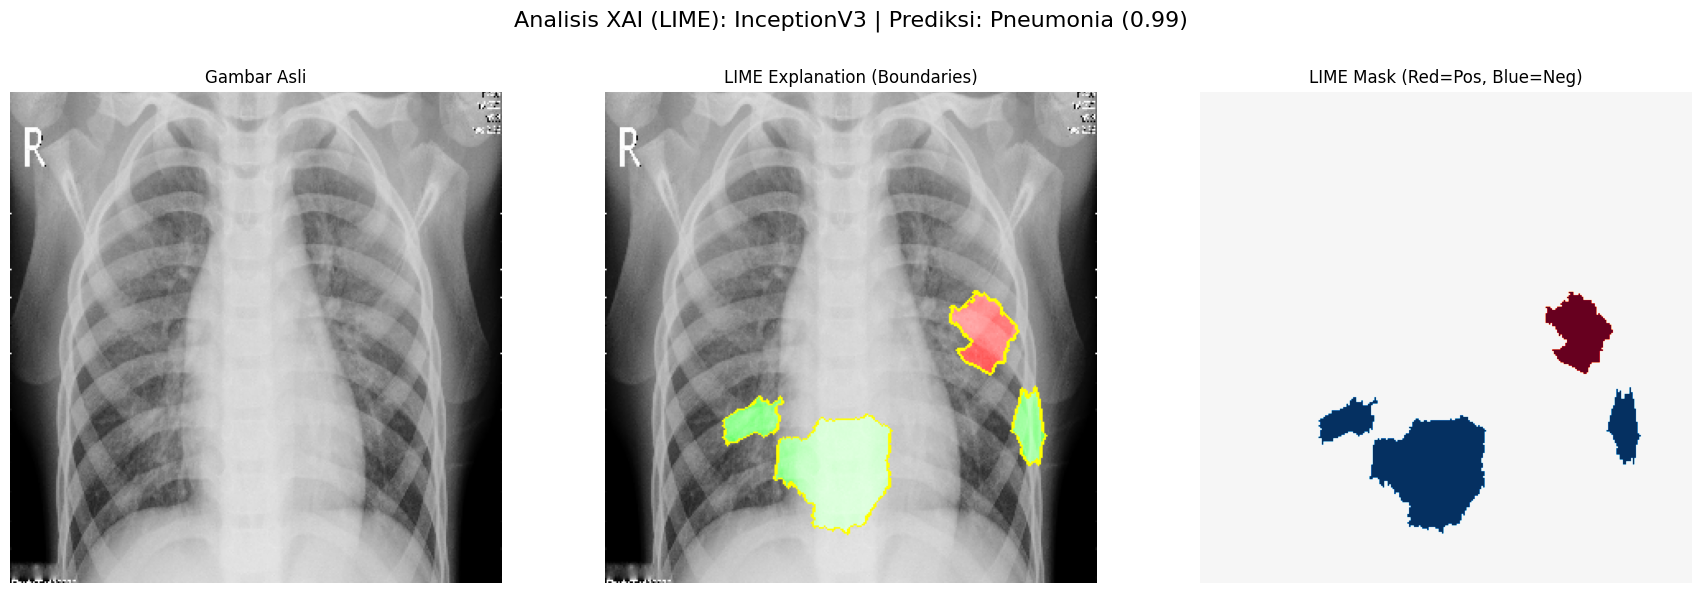


--- Menganalisis gambar: person1650_virus_2852.jpeg ---
  - Memproses model: ResNet50
  - Inisialisasi LIME Explainer untuk ResNet50...
  - Menghasilkan penjelasan LIME untuk person1650_virus_2852.jpeg...


  0%|          | 0/100 [00:00<?, ?it/s]

  - Membuat visualisasi LIME untuk person1650_virus_2852.jpeg...


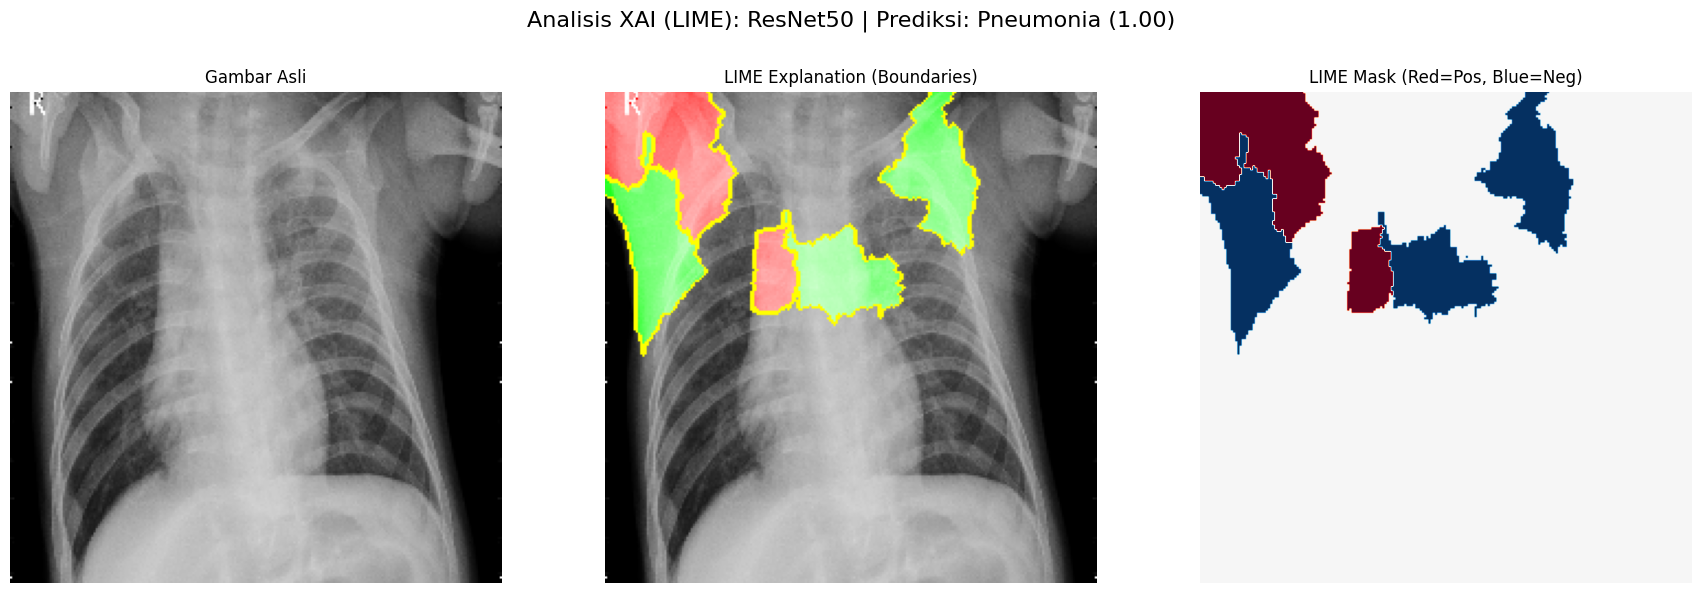

  - Memproses model: DenseNet121
  - Inisialisasi LIME Explainer untuk DenseNet121...
  - Menghasilkan penjelasan LIME untuk person1650_virus_2852.jpeg...


  0%|          | 0/100 [00:00<?, ?it/s]

  - Membuat visualisasi LIME untuk person1650_virus_2852.jpeg...


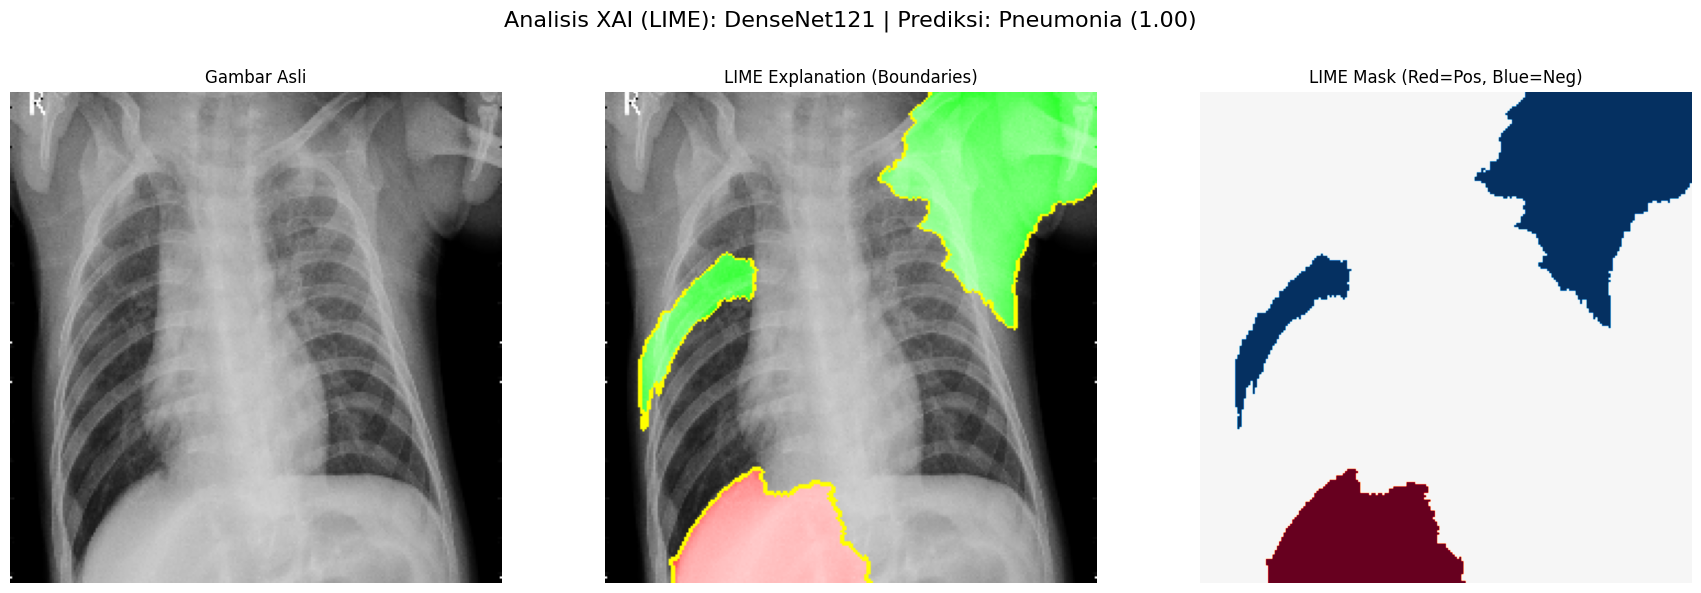

  - Memproses model: InceptionV3
  - Inisialisasi LIME Explainer untuk InceptionV3...
  - Menghasilkan penjelasan LIME untuk person1650_virus_2852.jpeg...


  0%|          | 0/100 [00:00<?, ?it/s]

  - Membuat visualisasi LIME untuk person1650_virus_2852.jpeg...


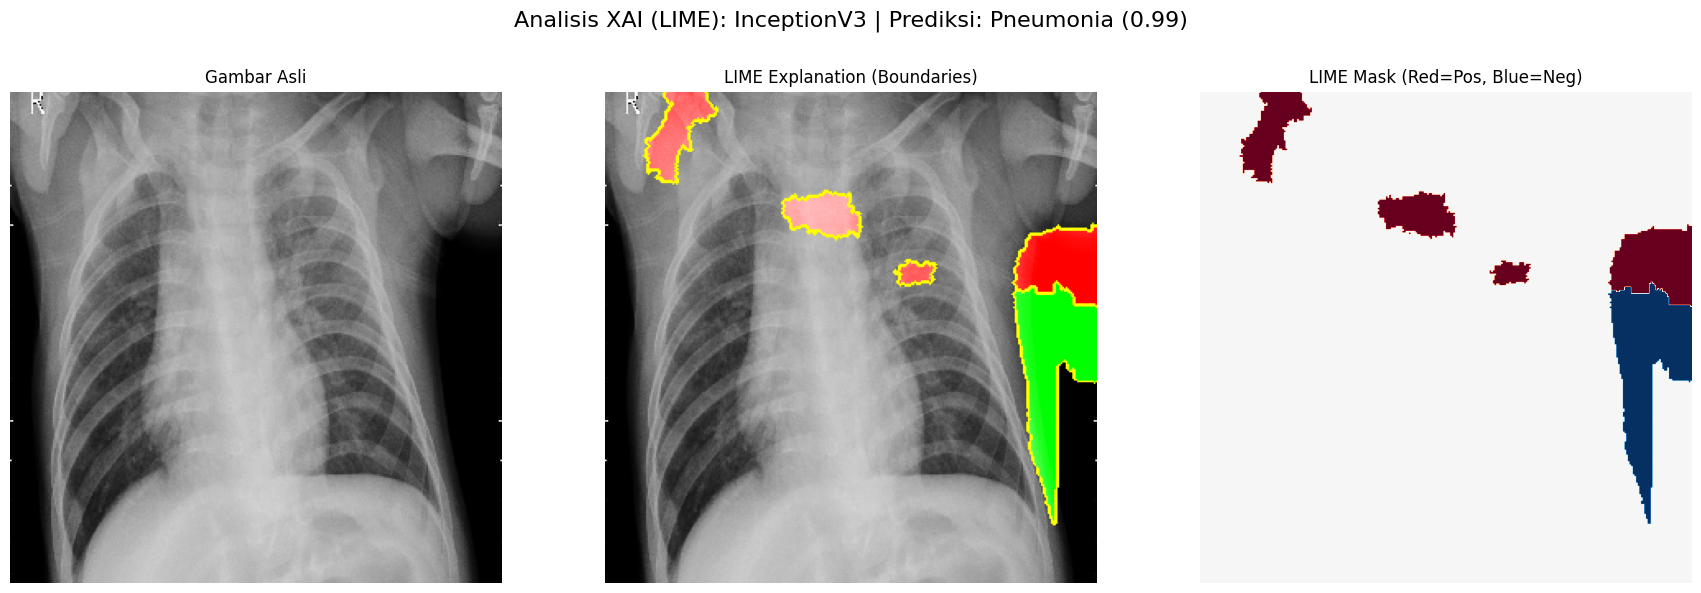


--- Menganalisis gambar: person22_virus_55.jpeg ---
  - Memproses model: ResNet50
  - Inisialisasi LIME Explainer untuk ResNet50...
  - Menghasilkan penjelasan LIME untuk person22_virus_55.jpeg...


  0%|          | 0/100 [00:00<?, ?it/s]

  - Membuat visualisasi LIME untuk person22_virus_55.jpeg...


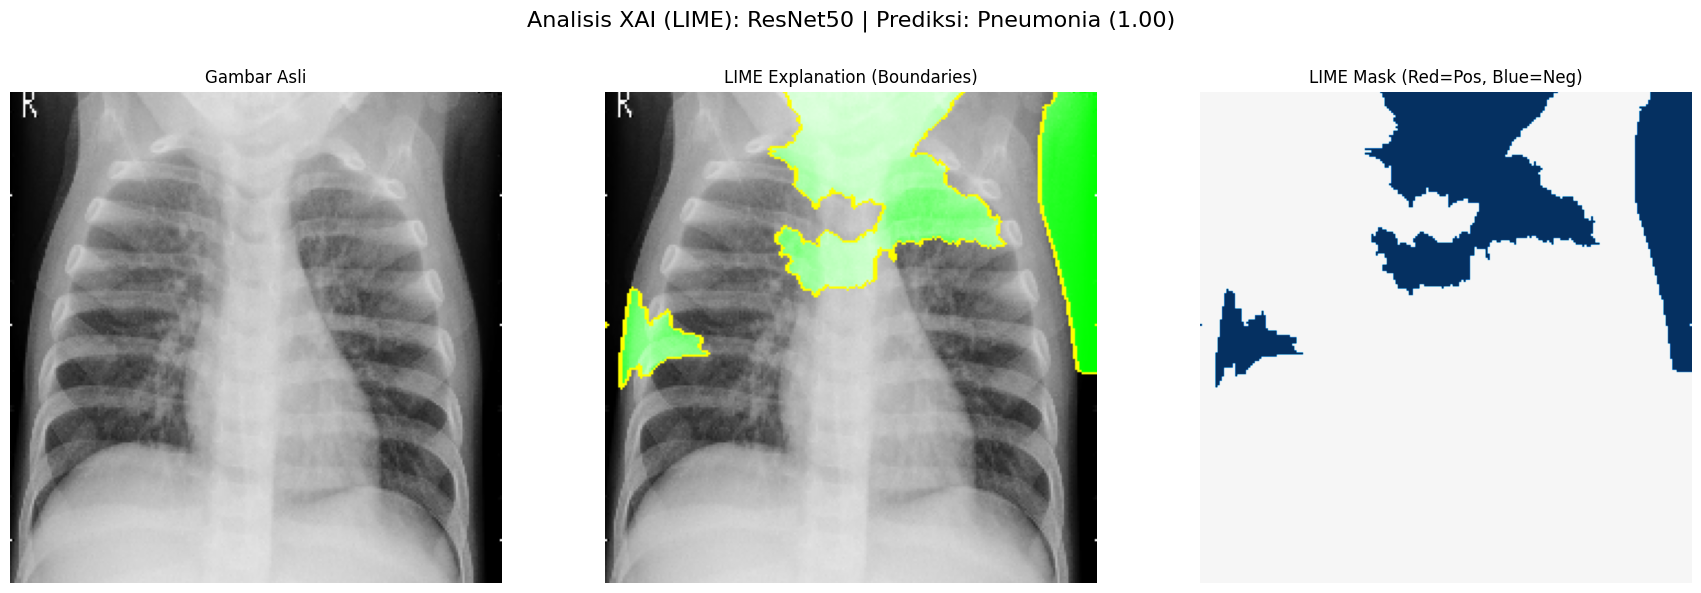

  - Memproses model: DenseNet121
  - Inisialisasi LIME Explainer untuk DenseNet121...
  - Menghasilkan penjelasan LIME untuk person22_virus_55.jpeg...


  0%|          | 0/100 [00:00<?, ?it/s]

  - Membuat visualisasi LIME untuk person22_virus_55.jpeg...


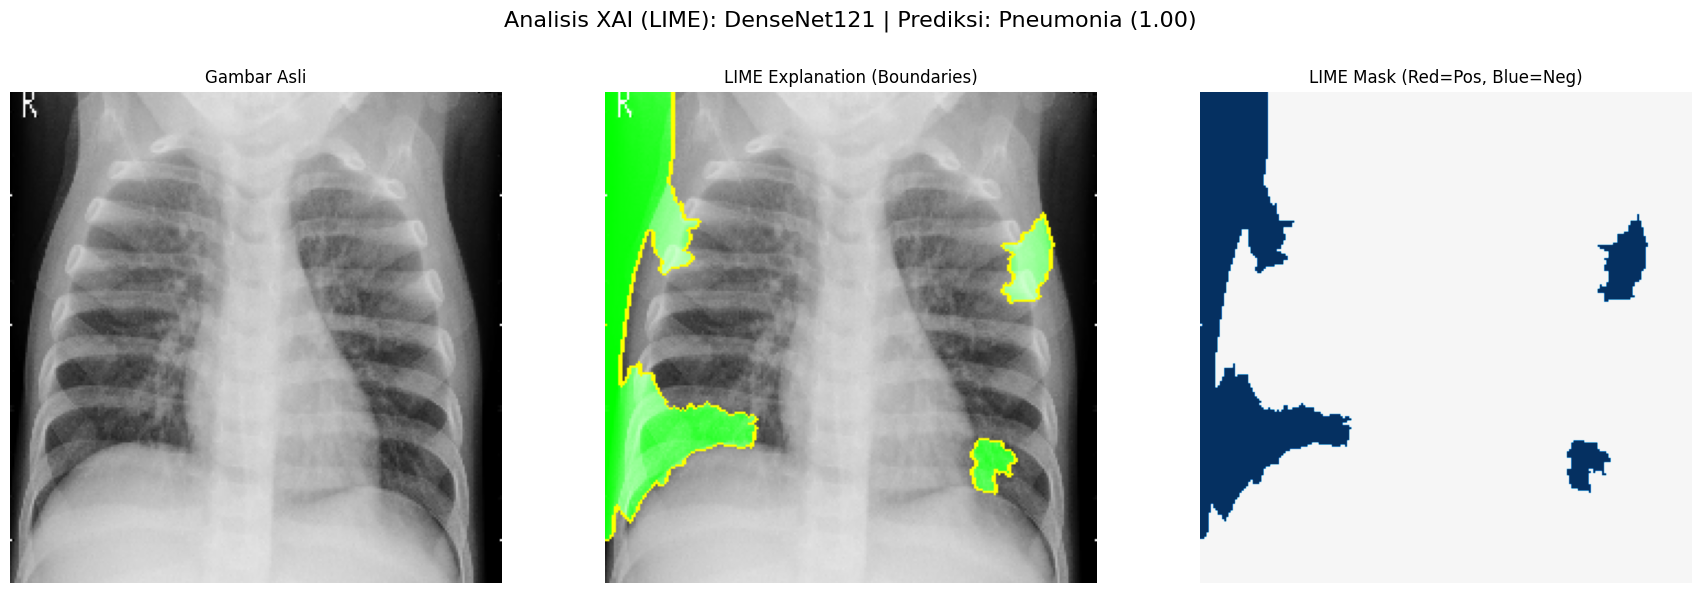

  - Memproses model: InceptionV3
  - Inisialisasi LIME Explainer untuk InceptionV3...
  - Menghasilkan penjelasan LIME untuk person22_virus_55.jpeg...


  0%|          | 0/100 [00:00<?, ?it/s]

  - Membuat visualisasi LIME untuk person22_virus_55.jpeg...


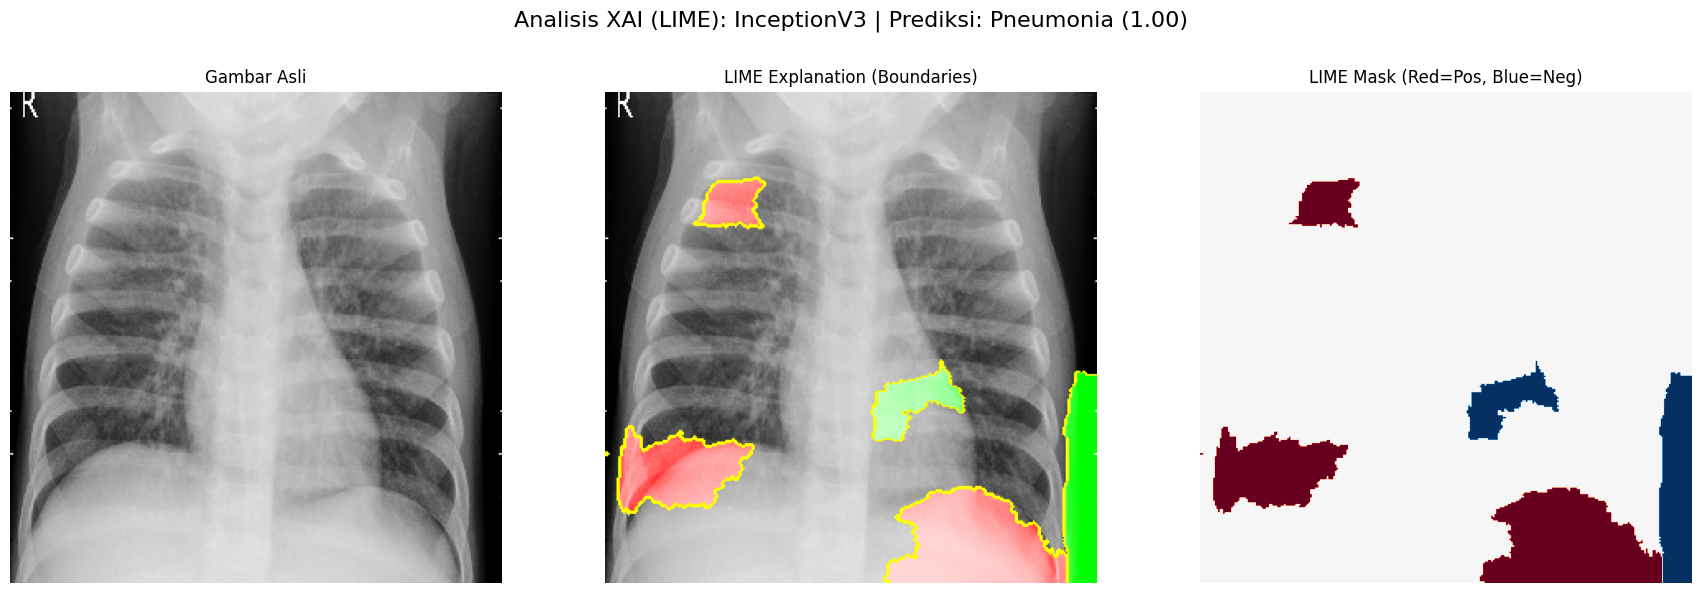


RINGKASAN ANALISIS LIME
         model                       image pred_label  pred_proba
0     ResNet50  person1676_virus_2892.jpeg  Pneumonia      0.9990
1  DenseNet121  person1676_virus_2892.jpeg  Pneumonia      0.9999
2  InceptionV3  person1676_virus_2892.jpeg  Pneumonia      0.9928
3     ResNet50  person1650_virus_2852.jpeg  Pneumonia      0.9992
4  DenseNet121  person1650_virus_2852.jpeg  Pneumonia      0.9998
5  InceptionV3  person1650_virus_2852.jpeg  Pneumonia      0.9927
6     ResNet50      person22_virus_55.jpeg  Pneumonia      1.0000
7  DenseNet121      person22_virus_55.jpeg  Pneumonia      0.9995
8  InceptionV3      person22_virus_55.jpeg  Pneumonia      0.9970

File visualisasi LIME telah disimpan.

Tahap 10: Menyimpan model yang telah dilatih...
✓ Model ResNet50 berhasil disimpan di: ./saved_models/resnet50_final.h5
✓ Model DenseNet121 berhasil disimpan di: ./saved_models/densenet121_final.h5
✓ Model InceptionV3 berhasil disimpan di: ./saved_models/inceptionv3_final.h5

In [2]:
# ============================================================================
# BAGIAN 1/4: PENGATURAN, KONFIGURASI, DAN PERSIAPAN DATA
# ============================================================================
# ----------------------------------------------------------------------------
# Langkah 0: Instalasi Library Tambahan
# ----------------------------------------------------------------------------
print("Tahap 0: Menginstal library yang diperlukan (SHAP, LIME)...")
# Menggunakan --quiet untuk output yang lebih bersih
!pip install shap lime --quiet
print("✓ Instalasi selesai.")
# ----------------------------------------------------------------------------
# Langkah 1: Impor Library & Pengaturan Global
# ----------------------------------------------------------------------------
print("\nTahap 1: Mengimpor library dan melakukan pengaturan global...")
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from glob import glob
import warnings
from tqdm.notebook import tqdm
# Mengatur agar peringatan tidak mengganggu output
warnings.filterwarnings('ignore')
# Impor library XAI (Explainable AI)
import shap
import lime
from lime import lime_image
from skimage.segmentation import mark_boundaries
# Impor library TensorFlow & Keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.applications import (
    ResNet50, DenseNet121, InceptionV3,
    resnet50, densenet, inception_v3
)
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras import mixed_precision
# Impor library Scikit-learn
from sklearn.metrics import (classification_report, confusion_matrix,
                             roc_curve, auc, precision_recall_curve, f1_score, precision_score, recall_score, roc_auc_score)
# Mengatur kebijakan presisi ke float32. Ini penting untuk stabilitas
# library XAI seperti LIME, terutama saat menggunakan GPU.
policy = mixed_precision.Policy('float32')
mixed_precision.set_global_policy(policy)
# Mengatur seed untuk CPU (numpy) dan GPU (tensorflow) agar hasil
# eksperimen dapat direproduksi (reproducible).
np.random.seed(42)
tf.random.set_seed(42)
# Mencetak informasi versi dan konfigurasi untuk verifikasi
print(f"  - TensorFlow Version: {tf.__version__}")
print(f"  - SHAP Version: {shap.__version__}")
print(f"  - GPU Available: {'Yes' if tf.config.list_physical_devices('GPU') else 'No'}")
print(f"  - Mixed Precision Policy: {mixed_precision.global_policy().name}")
print("✓ Pengaturan global selesai.")
# ----------------------------------------------------------------------------
# Langkah 2: Pengaturan Model Segmentasi Paru-Paru (Alat Bantu untuk Evaluasi XAI) - DIHAPUS
# ----------------------------------------------------------------------------
# Kode untuk U-Net dan pemanggilannya dihapus sesuai permintaan.
print("\nTahap 2: Langkah ini (Segmentasi U-Net) telah dihapus sesuai permintaan.")
segmentation_model = None # Tetap definisikan sebagai None untuk kompatibilitas jika diperlukan nanti
print("✓ Model segmentasi diatur sebagai None.")
# ----------------------------------------------------------------------------
# Langkah 3: Konfigurasi, Path, dan Persiapan Data
# ----------------------------------------------------------------------------
print("\nTahap 3: Mengonfigurasi parameter dan menyiapkan pipeline data...")
# ---- Path Detection ----
def find_dataset_paths():
    """Fungsi untuk mendeteksi path dataset secara otomatis di lingkungan Kaggle."""
    possible_bases = ["/kaggle/input/pneumonia", "/kaggle/input/chest-xray-pneumonia", "/kaggle/input/chest-xray-pneumonia/chest_xray", "/kaggle/input"]
    for base in possible_bases:
        if not os.path.exists(base): continue
        structures = [
            {'train': os.path.join(base, 'Pneumonia/train'), 'val': os.path.join(base, 'Pneumonia/val'), 'test': os.path.join(base, 'Pneumonia/test')},
            {'train': os.path.join(base, 'chest_xray/train'), 'val': os.path.join(base, 'chest_xray/val'), 'test': os.path.join(base, 'chest_xray/test')},
            {'train': os.path.join(base, 'train'), 'val': os.path.join(base, 'val'), 'test': os.path.join(base, 'test')}
        ]
        for struct in structures:
            if all(os.path.exists(p) for p in struct.values()):
                # Verifikasi cepat bahwa direktori tidak kosong
                if len(glob(os.path.join(struct['train'], '*/*'))) > 0:
                    print("✓ Dataset ditemukan!")
                    return base, struct['train'], struct['val'], struct['test']
    raise FileNotFoundError("Dataset pneumonia tidak ditemukan! Harap periksa 'Add data'.")
base_dir, train_dir, val_dir, test_dir = find_dataset_paths()
# ---- Konfigurasi Eksperimen ----
class Config:
    """Kelas untuk menyimpan semua hyperparameter dan konfigurasi secara terpusat."""
    TRAIN_DIR = train_dir
    VAL_DIR = val_dir
    TEST_DIR = test_dir
    # Ukuran input yang berbeda untuk model yang berbeda
    IMG_SIZE_224 = (224, 224)  # Untuk ResNet50, DenseNet121
    IMG_SIZE_299 = (299, 299)  # WAJIB untuk InceptionV3
    BATCH_SIZE = 32
    EPOCHS = 30  # Dinaikkan untuk memberi waktu lebih banyak belajar
    LEARNING_RATE = 1e-4
    # Parameter untuk augmentasi data yang realistis secara medis
    ROTATION_RANGE, WIDTH_SHIFT, HEIGHT_SHIFT, ZOOM_RANGE, SHEAR_RANGE = 12, 0.1, 0.1, 0.1, 0.1
    # Parameter augmentasi tambahan untuk potensi peningkatan generalisasi
    BRIGHTNESS_RANGE = [0.8, 1.2]
    CHANNEL_SHIFT_RANGE = 0.1
    MODEL_DIR = "./saved_models"
config = Config()
os.makedirs(config.MODEL_DIR, exist_ok=True)
print(f"  - Parameter diatur: Epochs={config.EPOCHS}, Batch Size={config.BATCH_SIZE}")
# ---- Analisis Distribusi Data & Perhitungan Class Weight ----
def explore_dataset(train_dir, val_dir, test_dir):
    """Menganalisis dan mencetak distribusi kelas (Normal vs. Pneumonia)."""
    stats = {}
    for split_name, split_path in [('train', train_dir), ('val', val_dir), ('test', test_dir)]:
        try:
            normal_count = len(glob(os.path.join(split_path, "NORMAL/*")))
            pneumonia_count = len(glob(os.path.join(split_path, "PNEUMONIA/*")))
            stats[split_name] = {'NORMAL': normal_count, 'PNEUMONIA': pneumonia_count, 'Total': normal_count + pneumonia_count}
        except FileNotFoundError:
            stats[split_name] = {'NORMAL': 0, 'PNEUMONIA': 0, 'Total': 0}
    df = pd.DataFrame(stats).T.fillna(0).astype(int)
    print("\n--- Distribusi Dataset ---")
    print(df)
    return stats
dataset_stats = explore_dataset(config.TRAIN_DIR, config.VAL_DIR, config.TEST_DIR)
# Menghitung bobot kelas untuk menangani data yang tidak seimbang
total_train = dataset_stats['train']['Total']
normal_train = dataset_stats['train']['NORMAL']
pneumonia_train = dataset_stats['train']['PNEUMONIA']
if total_train > 0 and normal_train > 0 and pneumonia_train > 0:
    weight_for_0 = total_train / (2 * normal_train)
    weight_for_1 = total_train / (2 * pneumonia_train)
    config.CLASS_WEIGHTS = {0: weight_for_0, 1: weight_for_1}
    print(f"\n✓ Bobot kelas dihitung untuk mengatasi ketidakseimbangan: {config.CLASS_WEIGHTS}")
else:
    config.CLASS_WEIGHTS = {0: 1.0, 1: 1.0}
    print("\n⚠ Peringatan: Tidak dapat menghitung bobot kelas, menggunakan bobot default (1:1).")
# ---- Pembuatan Generator Data ----
def create_generators():
    """Membuat generator data Keras dengan augmentasi dan preprocessing yang benar."""
    print("\nMembuat generator data...")
    # --- Set Generator untuk ukuran 224x224 (ResNet50, DenseNet121) ---
    train_datagen_224 = ImageDataGenerator(
        preprocessing_function=resnet50.preprocess_input, # Menggunakan preprocessing bawaan
        rotation_range=config.ROTATION_RANGE,
        width_shift_range=config.WIDTH_SHIFT,
        height_shift_range=config.HEIGHT_SHIFT,
        zoom_range=config.ZOOM_RANGE,
        shear_range=config.SHEAR_RANGE,
        brightness_range=config.BRIGHTNESS_RANGE, # Augmentasi tambahan
        channel_shift_range=config.CHANNEL_SHIFT_RANGE, # Augmentasi tambahan
        horizontal_flip=True,
        fill_mode='nearest'
    )
    val_test_datagen_224 = ImageDataGenerator(preprocessing_function=resnet50.preprocess_input)
    train_gen_224 = train_datagen_224.flow_from_directory(config.TRAIN_DIR, target_size=config.IMG_SIZE_224, batch_size=config.BATCH_SIZE, class_mode='binary', shuffle=True, seed=42)
    val_gen_224 = val_test_datagen_224.flow_from_directory(config.VAL_DIR, target_size=config.IMG_SIZE_224, batch_size=config.BATCH_SIZE, class_mode='binary', shuffle=False)
    test_gen_224 = val_test_datagen_224.flow_from_directory(config.TEST_DIR, target_size=config.IMG_SIZE_224, batch_size=config.BATCH_SIZE, class_mode='binary', shuffle=False)
    print("✓ Generator 224x224 (untuk ResNet50, DenseNet121) berhasil dibuat.")
    # --- Set Generator untuk ukuran 299x299 (InceptionV3) ---
    train_datagen_299 = ImageDataGenerator(
        preprocessing_function=inception_v3.preprocess_input, # Menggunakan preprocessing bawaan
        rotation_range=config.ROTATION_RANGE,
        width_shift_range=config.WIDTH_SHIFT,
        height_shift_range=config.HEIGHT_SHIFT,
        zoom_range=config.ZOOM_RANGE,
        shear_range=config.SHEAR_RANGE,
        brightness_range=config.BRIGHTNESS_RANGE, # Augmentasi tambahan
        channel_shift_range=config.CHANNEL_SHIFT_RANGE, # Augmentasi tambahan
        horizontal_flip=True,
        fill_mode='nearest'
    )
    val_test_datagen_299 = ImageDataGenerator(preprocessing_function=inception_v3.preprocess_input)
    train_gen_299 = train_datagen_299.flow_from_directory(config.TRAIN_DIR, target_size=config.IMG_SIZE_299, batch_size=config.BATCH_SIZE, class_mode='binary', shuffle=True, seed=42)
    val_gen_299 = val_test_datagen_299.flow_from_directory(config.VAL_DIR, target_size=config.IMG_SIZE_299, batch_size=config.BATCH_SIZE, class_mode='binary', shuffle=False)
    test_gen_299 = val_test_datagen_299.flow_from_directory(config.TEST_DIR, target_size=config.IMG_SIZE_299, batch_size=config.BATCH_SIZE, class_mode='binary', shuffle=False)
    print("✓ Generator 299x299 (untuk InceptionV3) berhasil dibuat.")
    # Mencetak jumlah sampel yang ditemukan
    print(f"  - Total sampel training: {train_gen_224.samples}")
    print(f"  - Total sampel validasi: {val_gen_224.samples} (Catatan: set validasi ini kecil, pertimbangkan K-Fold CV untuk riset lanjutan)")
    print(f"  - Total sampel tes: {test_gen_224.samples}")
    return (train_gen_224, val_gen_224, test_gen_224), (train_gen_299, val_gen_299, test_gen_299)
(train_gen_224, val_gen_224, test_gen_224), (train_gen_299, val_gen_299, test_gen_299) = create_generators()
print("\n✓ Persiapan data selesai. Siap untuk membangun dan melatih model.")
print("\n" + "="*80)
print("Akhir dari Bagian 1/4. Silakan berikan perintah 'lanjutkan'.")
print("="*80)
# ============================================================================
# BAGIAN 2/4: PEMBANGUNAN DAN PELATIHAN MODEL
# ============================================================================
print("Memulai Bagian 2: Pembangun dan Pelatihan Model...")
# ----------------------------------------------------------------------------
# Langkah 4: Fungsi untuk Membangun dan Melatih Model Individual
# ----------------------------------------------------------------------------
print("\nTahap 4: Mendefinisikan fungsi untuk membangun dan melatih model...")
def build_individual_model(base_model_class, model_name, input_shape):
    """
    Membangun model kustom di atas arsitektur pre-trained (transfer learning).
    Args:
        base_model_class: Kelas dari model dasar (e.g., ResNet50).
        model_name (str): Nama untuk model yang akan dibangun.
        input_shape (tuple): Bentuk input gambar (H, W, C).
    Returns:
        tf.keras.Model: Model Keras yang telah dikompilasi.
    """
    print(f"\n--- Membangun model: {model_name} dengan input {input_shape} ---")
    # 1. Muat model dasar dengan bobot dari ImageNet, tanpa lapisan klasifikasi (include_top=False)
    # Perbaikan: Pastikan input_shape memiliki 3 elemen (tinggi, lebar, channel)
    # Karena kita memproses gambar RGB, channel selalu 3
    input_shape_with_channels = input_shape + (3,) if len(input_shape) == 2 else input_shape
    base_model = base_model_class(
        include_top=False,
        weights='imagenet',
        input_shape=input_shape_with_channels # Gunakan shape yang benar
    )
    # 2. Terapkan strategi fine-tuning: 'unfreeze' beberapa lapisan terakhir
    #    Ini memungkinkan model untuk mempelajari fitur yang lebih spesifik untuk data rontgen.
    #    Kita akan membuat 50 lapisan terakhir dapat dilatih (lebih agresif).
    for layer in base_model.layers:
        layer.trainable = False  # Bekukan semua lapisan terlebih dahulu
    if len(base_model.layers) > 50:
        for layer in base_model.layers[-50:]:
            layer.trainable = True # Buka 'gembok' 50 lapisan terakhir
    # 3. Bangun 'kepala' klasifikasi kustom di atas model dasar
    inputs = keras.Input(shape=input_shape_with_channels, name=f'input_{model_name}')
    # Set training=False untuk base_model agar lapisan BatchNormalization
    # menggunakan statistik yang telah dipelajari dari ImageNet. Ini lebih stabil.
    x = base_model(inputs, training=False)
    x = layers.GlobalAveragePooling2D(name='global_avg_pool')(x)
    x = layers.Dropout(0.3, name='dropout_top_1')(x) # Dropout sedikit lebih rendah
    x = layers.Dense(512, activation='relu', name='dense_top_1')(x) # Tambah layer
    x = layers.Dropout(0.3, name='dropout_top_2')(x) # Dropout tambahan
    # Output akhir dengan aktivasi sigmoid untuk klasifikasi biner
    outputs = layers.Dense(1, activation='sigmoid', name='output_classifier')(x)
    model = models.Model(inputs=inputs, outputs=outputs, name=model_name)
    # Hitung dan cetak jumlah parameter yang dapat dilatih
    trainable_params = sum([tf.size(v).numpy() for v in model.trainable_variables])
    total_params = sum([tf.size(v).numpy() for v in model.variables])
    print(f"✓ Model {model_name} berhasil dibangun.")
    print(f"  - Total Parameter: {total_params:,}")
    print(f"  - Parameter Dapat Dilatih: {trainable_params:,} ({trainable_params/total_params:.2%})")
    return model

def get_training_callbacks(model_name):
    """
    Mengonfigurasi dan mengembalikan serangkaian callback untuk proses pelatihan.
    """
    # 1. EarlyStopping: Menghentikan pelatihan jika tidak ada peningkatan pada val_loss
    #    untuk beberapa epoch (patience) untuk mencegah overfitting.
    early_stop = EarlyStopping(
        monitor='val_loss',
        patience=7,  # Lebih sabar
        restore_best_weights=True,
        verbose=1
    )
    # 2. ReduceLROnPlateau: Mengurangi learning rate jika loss di data validasi stagnan.
    #    Ini membantu model keluar dari 'plateau' lokal.
    reduce_lr = ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.2, # Kurangi LR sebesar 80%
        patience=3, # Tunggu lebih lama sebelum menurunkan LR
        min_lr=1e-7,
        verbose=1
    )
    # 3. ModelCheckpoint: Menyimpan bobot model terbaik (berdasarkan val_accuracy)
    #    selama proses pelatihan.
    # Perbaikan: Gunakan ekstensi .weights.h5 untuk save_weights_only=True di Keras 3.x
    checkpoint = ModelCheckpoint(
        filepath=os.path.join(config.MODEL_DIR, f'{model_name}_best_weights.weights.h5'),
        monitor='val_accuracy',
        save_best_only=True,
        save_weights_only=True, # Lebih efisien, hanya menyimpan bobot
        verbose=1
    )
    return [early_stop, reduce_lr, checkpoint]

def train_individual_model(model, train_gen, val_gen):
    """
    Mengompilasi dan melatih satu model individual.
    """
    model_name = model.name
    print(f"\n--- Memulai Pelatihan untuk: {model_name} ---")
    # 1. Kompilasi model dengan optimizer, loss function, dan metrik
    model.compile(
        optimizer=optimizers.Adam(learning_rate=config.LEARNING_RATE),
        loss='binary_crossentropy',
        metrics=[
            'accuracy',
            keras.metrics.Precision(name='precision'),
            keras.metrics.Recall(name='recall'),
            keras.metrics.AUC(name='auc')
        ]
    )
    # 2. Cetak ringkasan singkat dari arsitektur model
    model.summary(line_length=100)
    # 3. Mulai proses pelatihan menggunakan metode .fit()
    history = model.fit(
        train_gen,
        epochs=config.EPOCHS,
        validation_data=val_gen,
        class_weight=config.CLASS_WEIGHTS,
        callbacks=get_training_callbacks(model_name),
        verbose=1  # Tampilkan progress bar
    )
    # 4. Muat kembali bobot terbaik yang disimpan oleh ModelCheckpoint
    # Perbaikan: Sesuaikan path file untuk memuat bobot .weights.h5
    best_weights_path = os.path.join(config.MODEL_DIR, f'{model_name}_best_weights.weights.h5')
    if os.path.exists(best_weights_path):
        print(f"\nMemuat kembali bobot terbaik dari {best_weights_path}...")
        model.load_weights(best_weights_path)
        print("✓ Bobot terbaik berhasil dimuat.")
    print(f"\n✓ Pelatihan untuk {model_name} selesai.")
    return history, model
print("✓ Fungsi untuk pembangunan dan pelatihan model telah didefinisikan.")
# ----------------------------------------------------------------------------
# Langkah 5: Membangun dan Melatih Ketiga Model Secara Berurutan
# ----------------------------------------------------------------------------
print("\nTahap 5: Memulai pipeline pembangunan dan pelatihan untuk semua model...")
# Kamus untuk menyimpan riwayat pelatihan dan model yang telah dilatih
histories = {}
trained_models = {}
# ---- Model 1: ResNet50 ----
resnet_base = build_individual_model(ResNet50, "ResNet50", config.IMG_SIZE_224)
histories['ResNet50'], trained_models['ResNet50'] = train_individual_model(resnet_base, train_gen_224, val_gen_224)
# ---- Model 2: DenseNet121 ----
densenet_base = build_individual_model(DenseNet121, "DenseNet121", config.IMG_SIZE_224)
histories['DenseNet121'], trained_models['DenseNet121'] = train_individual_model(densenet_base, train_gen_224, val_gen_224)
# ---- Model 3: InceptionV3 ----
inception_base = build_individual_model(InceptionV3, "InceptionV3", config.IMG_SIZE_299)
# InceptionV3 dilatih dengan generator data 299x299 yang sesuai
histories['InceptionV3'], trained_models['InceptionV3'] = train_individual_model(inception_base, train_gen_299, val_gen_299)
print("\n✓ Semua model telah selesai dilatih.")
print("\n" + "="*80)
print("Akhir dari Bagian 2/4. Silakan berikan perintah 'lanjutkan'.")
print("="*80)
# ============================================================================
# BAGIAN 3/4: EVALUASI MODEL DAN VISUALISASI PERFORMA
# ============================================================================
print("Memulai Bagian 3: Evaluasi Model dan Visualisasi Hasil...")

# Asumsikan variabel `trained_models` dan `histories` sudah ada dari sel sebelumnya.
if 'trained_models' not in locals() or 'histories' not in locals():
    raise NameError("Variabel `trained_models` dan `histories` tidak ditemukan. Harap jalankan sel pelatihan (Bagian 2) terlebih dahulu.")

# ----------------------------------------------------------------------------
# Langkah 6: Fungsi untuk Evaluasi Ensemble dan Visualisasi
# ----------------------------------------------------------------------------
print("\nTahap 6: Mendefinisikan fungsi untuk evaluasi dan visualisasi...")

def get_predictions_for_eval(models_dict, test_gen_224, test_gen_299):
    """
    Mengumpulkan prediksi dari masing-masing model dan label sebenarnya.
    """
    filepaths = test_gen_224.filepaths # Ambil filepaths dari salah satu generator, asumsikan urutan konsisten
    y_true = test_gen_224.classes

    predictions = {}
    preprocess_funcs = {
        "ResNet50": resnet50.preprocess_input,
        "DenseNet121": densenet.preprocess_input,
        "InceptionV3": inception_v3.preprocess_input
    }
    img_sizes = {
        "ResNet50": config.IMG_SIZE_224,
        "DenseNet121": config.IMG_SIZE_224,
        "InceptionV3": config.IMG_SIZE_299
    }

    for model_name, model in models_dict.items():
        print(f"  - Menghitung prediksi untuk {model_name}...")
        model_preds = []
        for i in tqdm(range(len(filepaths)), desc=f"Prediksi {model_name}", leave=False):
            img_path = filepaths[i]
            img = load_img(img_path, target_size=img_sizes[model_name])
            img_array = img_to_array(img)
            processed_array = preprocess_funcs[model_name](np.expand_dims(img_array, axis=0))
            pred = model.predict(processed_array, verbose=0)[0, 0] # Ambil skalar
            model_preds.append(pred)
        predictions[model_name] = np.array(model_preds)

    return y_true, predictions

def evaluate_model_and_print_report(y_true, y_pred_proba, model_name="Model"):
    """
    Mengevaluasi model individual dan mencetak laporan metrik lengkap.
    """
    y_pred = (y_pred_proba > 0.5).astype(int)
    accuracy = np.mean(y_pred == y_true)
    f1 = f1_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    # Perbaikan: Gunakan roc_auc_score untuk menghitung AUC-ROC
    roc_auc = roc_auc_score(y_true, y_pred_proba)

    print(f"\n--- Laporan Evaluasi untuk {model_name} ---")
    print(f"Accuracy:  {accuracy:.4f}")
    print(f"F1-Score:  {f1:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"AUC-ROC:   {roc_auc:.4f}")
    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_true, y_pred)
    print(cm)
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=['Normal (Class 0)', 'Pneumonia (Class 1)'], digits=4))
    return accuracy, f1, precision, recall, roc_auc

def evaluate_ensemble_and_print_report(y_true, predictions_dict, weights=None):
    """
    Mengevaluasi ensemble dan mencetak laporan metrik lengkap.
    """
    if weights is None:
        weights = [1.0 / len(predictions_dict)] * len(predictions_dict)

    ensemble_probas = np.zeros_like(list(predictions_dict.values())[0])
    for i, (model_name, model_probas) in enumerate(predictions_dict.items()):
        ensemble_probas += weights[i] * model_probas

    accuracy, f1, precision, recall, roc_auc = evaluate_model_and_print_report(y_true, ensemble_probas, "Ensemble")
    return accuracy, f1, precision, recall, roc_auc, ensemble_probas

def plot_training_history(histories):
    """Membuat plot kurva akurasi dan loss dari riwayat pelatihan."""
    print("\nMembuat plot riwayat pelatihan...")
    num_models = len(histories)
    fig, axes = plt.subplots(2, num_models, figsize=(6 * num_models, 8))
    fig.suptitle('Riwayat Pelatihan Model', fontsize=16, fontweight='bold')
    for idx, (name, history) in enumerate(histories.items()):
        # Plot Akurasi
        ax = axes[0, idx]
        ax.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
        ax.plot(history.history['val_accuracy'], label='Val Accuracy', color='orange', linestyle='--')
        ax.set_title(f'{name} - Akurasi', fontsize=12)
        ax.set_xlabel('Epoch'); ax.set_ylabel('Akurasi'); ax.legend(); ax.grid(True, alpha=0.3)
        # Plot Loss
        ax = axes[1, idx]
        ax.plot(history.history['loss'], label='Train Loss', color='blue')
        ax.plot(history.history['val_loss'], label='Val Loss', color='orange', linestyle='--')
        ax.set_title(f'{name} - Loss', fontsize=12)
        ax.set_xlabel('Epoch'); ax.set_ylabel('Loss'); ax.legend(); ax.grid(True, alpha=0.3)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.savefig('training_history.png', dpi=300)
    plt.show()

def plot_confusion_matrix(y_true, y_pred, title="Confusion Matrix"):
    """Membuat plot confusion matrix."""
    print(f"\n--- {title} ---")
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Normal', 'Pneumonia'],
                yticklabels=['Normal', 'Pneumonia'])
    plt.title(title, fontsize=14, fontweight='bold')
    plt.ylabel('Label Sebenarnya (True Label)'); plt.xlabel('Label Prediksi (Predicted Label)')
    plt.savefig(f'{title.replace(" ", "_")}.png', dpi=300)
    plt.show()

def plot_roc_curve(y_true, y_pred_proba, title="ROC Curve"):
    """Membuat plot kurva ROC dan menghitung AUC."""
    print(f"\n--- {title} ---")
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    # Perbaikan: Gunakan roc_auc_score untuk menghitung AUC-ROC
    roc_auc = roc_auc_score(y_true, y_pred_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Kurva ROC (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Klasifikasi Acak')
    plt.xlim([0.0, 1.0]); plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate')
    plt.title(title, fontsize=14, fontweight='bold')
    plt.legend(loc="lower right"); plt.grid(True, alpha=0.3)
    plt.savefig(f'{title.replace(" ", "_")}.png', dpi=300)
    plt.show()

print("✓ Fungsi untuk evaluasi dan visualisasi telah didefinisikan.")

# ----------------------------------------------------------------------------
# Langkah 7: Mengeksekusi Evaluasi dan Visualisasi
# ----------------------------------------------------------------------------
print("\nTahap 7: Mengeksekusi pipeline evaluasi...")

# Ambil prediksi dari semua model
y_true, predictions_dict = get_predictions_for_eval(trained_models, test_gen_224, test_gen_299)

# --- Evaluasi Model Individual ---
individual_results = {}
for model_name, model_probas in predictions_dict.items():
    print(f"\n{'='*50}")
    print(f"EVALUASI MODEL INDIVIDUAL: {model_name}")
    print(f"{'='*50}")
    acc, f1, prec, rec, auc = evaluate_model_and_print_report(y_true, model_probas, model_name)
    individual_results[model_name] = {'Accuracy': acc, 'F1-Score': f1, 'Precision': prec, 'Recall': rec, 'AUC-ROC': auc}

# --- Evaluasi Ensemble ---
print(f"\n{'='*50}")
print("EVALUASI ENSEMBLE")
print(f"{'='*50}")
ensemble_weights = [1/3, 1/3, 1/3] # Rata-rata sederhana
acc_ens, f1_ens, prec_ens, rec_ens, auc_ens, ensemble_probas = evaluate_ensemble_and_print_report(y_true, predictions_dict, weights=ensemble_weights)
ensemble_results = {'Accuracy': acc_ens, 'F1-Score': f1_ens, 'Precision': prec_ens, 'Recall': rec_ens, 'AUC-ROC': auc_ens}

# --- Visualisasi Kurva Pelatihan ---
plot_training_history(histories)

# --- Visualisasi Ensemble ---
y_pred_ensemble = (ensemble_probas > 0.5).astype(int)
plot_confusion_matrix(y_true, y_pred_ensemble, "Confusion Matrix - Ensemble")
plot_roc_curve(y_true, ensemble_probas, "ROC Curve - Ensemble")

# --- Ringkasan Metrik ---
print(f"\n{'='*80}")
print("RINGKASAN METRIK EVALUASI")
print(f"{'='*80}")
results_df = pd.DataFrame(individual_results).T
results_df.loc['Ensemble'] = ensemble_results
print(results_df.round(4))

print("\n✓ Evaluasi dan visualisasi performa selesai.")
print("\n" + "="*80)
print("Akhir dari Bagian 3/4. Silakan berikan perintah 'lanjutkan'.")
print("="*80)

# ============================================================================
# BAGIAN 4/4: ANALISIS EXPLAINABLE AI (XAI) KUANTITATIF & KUALITATIF (HANYA LIME)
# ============================================================================
print("Memulai Bagian 4: Analisis Explainable AI (XAI) - LIME...")

# Asumsikan variabel `trained_models` sudah ada dari sel-sel sebelumnya.
if 'trained_models' not in locals():
    raise NameError("Variabel `trained_models` tidak ditemukan. Harap jalankan sel pelatihan (Bagian 2) terlebih dahulu.")

# ----------------------------------------------------------------------------
# Langkah 8: Mendefinisikan Fungsi untuk Analisis LIME
# ----------------------------------------------------------------------------
print("\nTahap 8: Mendefinisikan fungsi untuk analisis LIME...")

# Definisikan konfigurasi (pastikan ini sesuai dengan konfigurasi asli Anda)
# Sudah didefinisikan di Bagian 3

# Definisikan fungsi preprocessor secara eksplisit
def get_preprocessor(model_name):
    """Mengembalikan fungsi preprocessing yang benar berdasarkan nama model."""
    if model_name == 'ResNet50':
        return resnet50.preprocess_input
    elif model_name == 'DenseNet121':
        return densenet.preprocess_input
    elif model_name == 'InceptionV3':
        return inception_v3.preprocess_input
    else:
        raise ValueError(f"Preprocessor tidak dikenal untuk model: {model_name}")

# ----------------------------------------------------------------------------
# Fungsi untuk Analisis XAI menggunakan LIME
# ----------------------------------------------------------------------------
def calculate_xai_metrics_and_visualize_lime(model, img_path):
    """
    Fungsi inti yang menjalankan pipeline XAI (LIME) untuk satu gambar:
    1. Memproses gambar sesuai model.
    2. Menggunakan LIME untuk menjelaskan prediksi.
    3. Menghasilkan dan menyimpan plot visualisasi LIME.
    """
    # --- 1. Persiapan Gambar & Model ---
    model_name = model.name
    img_size = config.IMG_SIZE_299 if model_name == 'InceptionV3' else config.IMG_SIZE_224
    preprocessor = get_preprocessor(model_name)

    img = load_img(img_path, target_size=img_size)
    img_array = img_to_array(img)
    img_array_uint8 = np.uint8(img_array.copy()) # Simpan versi uint8 untuk visualisasi
    processed_array_for_pred = preprocessor(np.expand_dims(img_array.copy(), axis=0))

    # --- 2. Fungsi Wrapper Prediksi untuk LIME ---
    # LIME membutuhkan fungsi yang menerima batch array (num_samples, height, width, channels) dan mengembalikan probabilitas
    def predict_fn(images):
        # images adalah batch numpy array dengan ukuran yang benar (tidak perlu diproses ulang jika formatnya benar)
        processed_images = preprocessor(images)
        predictions = model.predict(processed_images, verbose=0)
        # Kembalikan array probabilitas untuk kelas (dalam kasus biner, ini shape (num_samples, 1))
        # LIME mengharapkan (num_samples, num_classes), jadi kita reshape jika perlu
        if predictions.shape[1] == 1: # Biner
            # Untuk biner, seringkali kita ingin mengembalikan probabilitas [kelas_negatif, kelas_positif]
            prob_pos = predictions[:, 0] # Ambil probabilitas kelas positif (1)
            prob_neg = 1 - prob_pos
            return np.column_stack((prob_neg, prob_pos)) # (num_samples, 2)
        return predictions # Untuk multi-class


    # --- 3. Inisialisasi Penjelas LIME ---
    print(f"  - Inisialisasi LIME Explainer untuk {model_name}...")
    explainer = lime_image.LimeImageExplainer()

    # --- 4. Hasilkan Penjelasan LIME ---
    print(f"  - Menghasilkan penjelasan LIME untuk {os.path.basename(img_path)}...")
    # Segmentasi gambar menjadi superpixels
    # num_samples: Jumlah gambar terganggu yang dihasilkan untuk pelatihan lokal (meningkatkan akurasi, tapi lebih lambat)
    # LIME akan mengacak keberadaan superpixels untuk membuat dataset lokal
    explanation = explainer.explain_instance(
        img_array_uint8, # Gunakan gambar uint8 untuk LIME
        predict_fn,
        top_labels=2, # Jelaskan kelas 0 dan 1 (Normal dan Pneumonia)
        hide_color=0, # Warna untuk menyembunyikan superpixels (0,0,0 = hitam)
        num_samples=100 # Jumlah sample lokal (bisa disesuaikan, 100 relatif cepat)
    )

    # --- 5. Ambil Penjelasan untuk Kelas Tertentu ---
    # Ambil prediksi tertinggi
    temp, mask = explanation.get_image_and_mask(
        explanation.top_labels[0], # Gunakan label tertinggi
        positive_only=False, # Tampilkan fitur positif dan negatif
        num_features=5, # Jumlah superpixels utama untuk dijelaskan
        hide_rest=False # Jangan sembunyikan sisanya
    )

    # --- 6. Visualisasi ---
    print(f"  - Membuat visualisasi LIME untuk {os.path.basename(img_path)}...")
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    pred_proba_full = model.predict(processed_array_for_pred, verbose=0)[0]
    # Untuk model biner sigmoid, proba adalah [kelas_positif], jadi prediksi adalah kelas 1 jika > 0.5
    pred_label_idx = 1 if pred_proba_full[0] > 0.5 else 0
    pred_proba = pred_proba_full[0] if pred_label_idx == 1 else 1 - pred_proba_full[0]
    class_names = ['Normal', 'Pneumonia']
    pred_label_name = class_names[pred_label_idx]

    fig.suptitle(f'Analisis XAI (LIME): {model.name} | Prediksi: {pred_label_name} ({pred_proba:.2f})', fontsize=16)

    axes[0].imshow(img_array_uint8.astype('uint8')); axes[0].set_title('Gambar Asli'); axes[0].axis('off')

    # Visualisasi hasil LIME
    img_bound = mark_boundaries(temp / 255.0, mask) # Gunakan temp yang sudah diwarnai
    axes[1].imshow(img_bound); axes[1].set_title('LIME Explanation (Boundaries)'); axes[1].axis('off')

    # Visualisasi mask LIME saja
    axes[2].imshow(mask, cmap='RdBu', vmin=-1, vmax=1); axes[2].set_title('LIME Mask (Red=Pos, Blue=Neg)'); axes[2].axis('off')

    plt.tight_layout(rect=[0, 0, 1, 0.93])
    plt.savefig(f'lime_analysis_{model_name}_{os.path.basename(img_path)}.png', dpi=150)
    plt.show()

    # Kembalikan sesuatu jika perlu (misalnya, informasi ringkas)
    return {'model': model_name, 'image': os.path.basename(img_path), 'pred_label': pred_label_name, 'pred_proba': pred_proba}


print("✓ Fungsi untuk analisis LIME telah didefinisikan.")

# ----------------------------------------------------------------------------
# Langkah 9: Menjalankan Analisis XAI (LIME) dan Menyimpan Hasil
# ----------------------------------------------------------------------------
print("\nTahap 9: Menjalankan pipeline analisis XAI (LIME) pada sampel data tes...")

# Pilih beberapa gambar sampel dari set tes untuk dianalisis
sample_images = glob(os.path.join(config.TEST_DIR, "PNEUMONIA/*.jpeg"))[:3] # Ambil 3 sampel
if not sample_images:
    print("⚠ Tidak ada gambar sampel ditemukan untuk analisis XAI.")
else:
    lime_results = []

    for img_path in sample_images:
        print(f"\n--- Menganalisis gambar: {os.path.basename(img_path)} ---")
        for model_name, model in trained_models.items():
            print(f"  - Memproses model: {model_name}")
            result = calculate_xai_metrics_and_visualize_lime(
                model,
                img_path
            )
            if result:
                lime_results.append(result)

    # Tampilkan hasil ringkas
    if lime_results:
        results_df = pd.DataFrame(lime_results)
        print("\n" + "="*80 + "\nRINGKASAN ANALISIS LIME\n" + "="*80)
        print(results_df[['model', 'image', 'pred_label', 'pred_proba']].round(4))
        print("\nFile visualisasi LIME telah disimpan.")
    else:
        print("\n⚠ Tidak ada hasil LIME yang dihasilkan.")


# ----------------------------------------------------------------------------
# Langkah 10: Menyimpan Model Final
# ----------------------------------------------------------------------------
print("\nTahap 10: Menyimpan model yang telah dilatih...")
for name, model in trained_models.items():
    try:
        # Perbaikan: Gunakan ekstensi .h5 untuk menyimpan model penuh
        model_save_path = os.path.join(config.MODEL_DIR, f"{name.lower()}_final.h5")
        model.save(model_save_path)
        print(f"✓ Model {name} berhasil disimpan di: {model_save_path}")
    except Exception as e:
        print(f"⚠ Gagal menyimpan model {name}: {e}")

print("\n" + "="*80)
print("Akhir dari Bagian 4/4. Seluruh pipeline telah selesai dieksekusi.")
print("="*80)

In [16]:
# --- Tambahkan kode ini setelah akhir kode asli Anda ---

print("\n" + "="*80)
print("Menyimpan Model dalam Format .keras")
print("="*80)

# Pastikan direktori untuk menyimpan model ada
os.makedirs(config.MODEL_DIR, exist_ok=True)

# Iterasi melalui kamus model yang telah dilatih
for model_name, model in trained_models.items():
    print(f"\n--- Menyimpan {model_name} dalam format .keras ---")
    try:
        # Buat path untuk file .keras
        keras_model_path = os.path.join(config.MODEL_DIR, f"{model_name.lower()}_full_model.keras")
        
        # Simpan model secara lengkap dalam format .keras
        model.save(keras_model_path)
        
        print(f"✓ Model '{model_name}' berhasil disimpan dalam format .keras di: {keras_model_path}")
        
    except Exception as e:
        print(f"⚠ Gagal menyimpan model '{model_name}' dalam format .keras: {e}")

print("\n" + "="*80)
print("Proses Penyimpanan Model .keras Selesai.")
print("="*80)

# --- Akhir dari kode tambahan ---


Menyimpan Model dalam Format .keras

--- Menyimpan ResNet50 dalam format .keras ---
✓ Model 'ResNet50' berhasil disimpan dalam format .keras di: ./saved_models/resnet50_full_model.keras

--- Menyimpan DenseNet121 dalam format .keras ---
✓ Model 'DenseNet121' berhasil disimpan dalam format .keras di: ./saved_models/densenet121_full_model.keras

--- Menyimpan InceptionV3 dalam format .keras ---
✓ Model 'InceptionV3' berhasil disimpan dalam format .keras di: ./saved_models/inceptionv3_full_model.keras

Proses Penyimpanan Model .keras Selesai.
